<a href="https://colab.research.google.com/github/Vinnzxx/Test/blob/main/Breast_Cancer_2_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# lokasi file
path = "/content/sample_data/wpbc.data"

# read file
data = pd.read_csv(path, header=None, sep=",")

# menambahkan nama kolom
column = ['ID','Outcome','time','radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1','symmetry1','fractal_dimension1','radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2','symmetry2','fractal_dimension2','radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3','symmetry3','fractal_dimension3','tumor_size','lymph_node_status']

# stetting nama kolom
data.columns = column

data.tail()

,ID,Outcome,time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status
193,942640,N,10,22.52,21.92,146.9,1597.0,0.07592,0.09162,0.06862,...,162.1,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.0,740.4,0.09399,0.10620,0.13750,...,112.6,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.0,915.3,0.08952,0.06655,0.06583,...,132.5,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.0,1440.0,0.10700,0.19390,0.23800,...,198.3,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?
197,947489,N,6,16.70,28.13,110.3,885.4,0.08896,0.11310,0.10120,...,128.8,1213.0,0.13300,0.2808,0.3455,0.13170,0.3035,0.08036,3.5,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  198 non-null    int64  
 1   Outcome             198 non-null    object 
 2   time                198 non-null    int64  
 3   radius1             198 non-null    float64
 4   texture1            198 non-null    float64
 5   perimeter1          198 non-null    float64
 6   area1               198 non-null    float64
 7   smoothness1         198 non-null    float64
 8   compactness1        198 non-null    float64
 9   concavity1          198 non-null    float64
 10  concave_points1     198 non-null    float64
 11  symmetry1           198 non-null    float64
 12  fractal_dimension1  198 non-null    float64
 13  radius2             198 non-null    float64
 14  texture2            198 non-null    float64
 15  perimeter2          198 non-null    float64
 16  area2   

In [10]:
# Mengidentifikasi jenis kolom (variabel) dalam sebuah dataframe berdasarkan tipe data dan karakteristiknya

def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    # cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    # cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car).
    return cat_cols, num_cols

# Memanggil fungsi grab_col_names yang telah didefinisikan untuk memisahkan kolom-kolom dalam dataframe menjadi tiga kategori berdasarkan tipe data dan karakteristik distribusinya
cat_cols, num_cols = grab_col_names(data)

Jumlah observasi: 198
Jumlah variabel: 35
Kolom kategorikal: 2
Kolom Numerik: 33


In [11]:
# cek data kategorikal

for col in cat_cols:
  print(f"{col} has {data[col].unique()} values\n")

Outcome has ['N' 'R'] values

lymph_node_status has ['5' '2' '0' '?' '10' '1' '20' '6' '13' '4' '17' '15' '11' '9' '8' '7' '3'
 '14' '27' '24' '18' '16' '21'] values



In [12]:
# delete rows with '?' in 'lymph_node_status' column
data = data[data['lymph_node_status'] != '?']

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 197
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  194 non-null    int64  
 1   Outcome             194 non-null    object 
 2   time                194 non-null    int64  
 3   radius1             194 non-null    float64
 4   texture1            194 non-null    float64
 5   perimeter1          194 non-null    float64
 6   area1               194 non-null    float64
 7   smoothness1         194 non-null    float64
 8   compactness1        194 non-null    float64
 9   concavity1          194 non-null    float64
 10  concave_points1     194 non-null    float64
 11  symmetry1           194 non-null    float64
 12  fractal_dimension1  194 non-null    float64
 13  radius2             194 non-null    float64
 14  texture2            194 non-null    float64
 15  perimeter2          194 non-null    float64
 16  area2        

In [13]:
# Cek missing value
data.isnull().sum()

,0
ID,0
Outcome,0
time,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0


In [14]:
data.drop_duplicates(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 197
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  194 non-null    int64  
 1   Outcome             194 non-null    object 
 2   time                194 non-null    int64  
 3   radius1             194 non-null    float64
 4   texture1            194 non-null    float64
 5   perimeter1          194 non-null    float64
 6   area1               194 non-null    float64
 7   smoothness1         194 non-null    float64
 8   compactness1        194 non-null    float64
 9   concavity1          194 non-null    float64
 10  concave_points1     194 non-null    float64
 11  symmetry1           194 non-null    float64
 12  fractal_dimension1  194 non-null    float64
 13  radius2             194 non-null    float64
 14  texture2            194 non-null    float64
 15  perimeter2          194 non-null    float64
 16  area2        

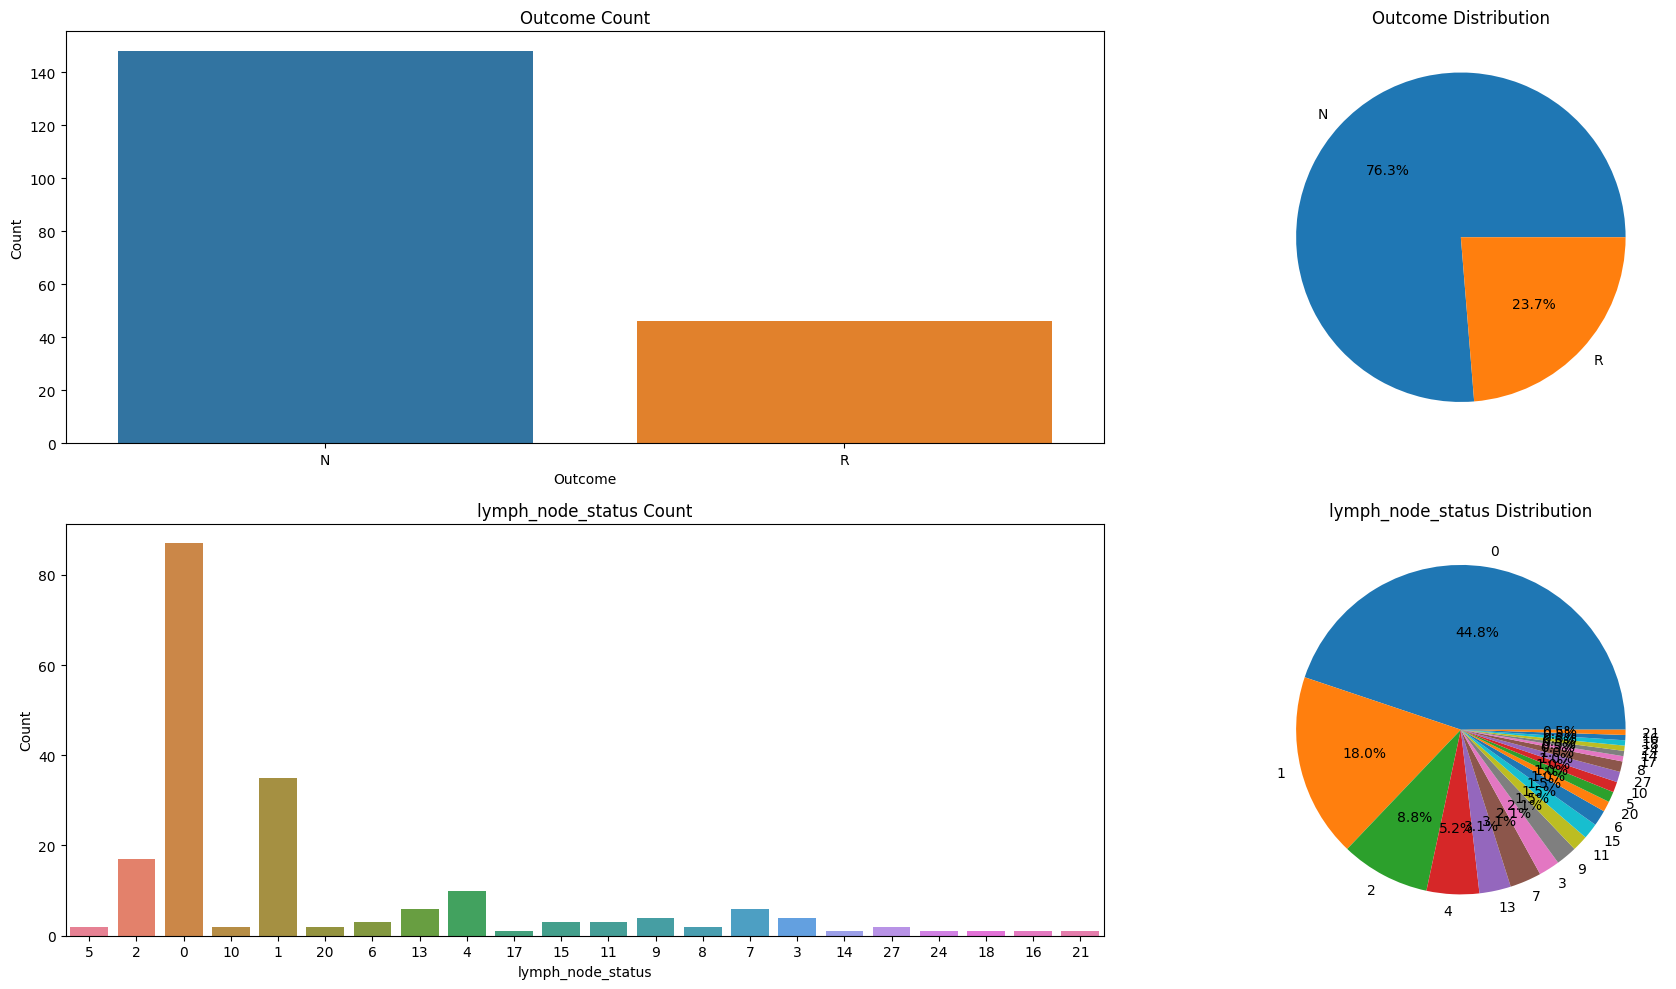

In [15]:
import matplotlib.pyplot as plt # visualisasi data (grafik dasar seperti garis, batang).
import seaborn as sns # visualisasi statistik yang lebih menarik dan informatif.

# Memvisualisasikan distribusi kolom-kolom kategorikal dalam sebuah dataframe menggunakan dua jenis plot: countplot dan pie plot
def plot_categorical(dataframe, categorical_columns): # membuat visualisasi untuk kolom kategorikal dalam dataset.
    num_cols = len(categorical_columns) # daftar kolom kategorikal yang akan divisualisasikan.
    num_rows = num_cols
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        # Countplot: Membuat countplot untuk distribusi jumlah kategori.
        sns.countplot(x=col, data=dataframe, ax=axes[2*i], hue=col) # menunjukkan jumlah observasi dalam setiap kategori menggunakan bar chart.
        axes[2*i].set_title(f'{col} Count')
        axes[2*i].set_xlabel(col)
        axes[2*i].set_ylabel('Count')

        # Pieplot: Membuat pieplot untuk distribusi proporsi kategori.
        dataframe[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2*i+1]) # menampilkan proporsi kategori dalam bentuk diagram lingkaran.
        axes[2*i+1].set_title(f'{col} Distribution')
        axes[2*i+1].set_ylabel('')

    # Menyesuaikan layout dengan plt.tight_layout() untuk hasil visualisasi yang rapi.
    plt.tight_layout()
    plt.show()

plot_categorical(data, cat_cols)  # Ganti 'data' dengan 'data' jika Anda ingin menggunakan dataframe original

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Dapatkan daftar fitur kategorikal
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Buat objek LabelEncoder
encoder = LabelEncoder()

# Loop melalui setiap fitur kategorikal dan lakukan encoding untuk mengubah kategorikal menjadi numerik
for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature])

data.head()

,ID,Outcome,time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,...,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,17
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,10
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 197
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  194 non-null    int64  
 1   Outcome             194 non-null    int64  
 2   time                194 non-null    int64  
 3   radius1             194 non-null    float64
 4   texture1            194 non-null    float64
 5   perimeter1          194 non-null    float64
 6   area1               194 non-null    float64
 7   smoothness1         194 non-null    float64
 8   compactness1        194 non-null    float64
 9   concavity1          194 non-null    float64
 10  concave_points1     194 non-null    float64
 11  symmetry1           194 non-null    float64
 12  fractal_dimension1  194 non-null    float64
 13  radius2             194 non-null    float64
 14  texture2            194 non-null    float64
 15  perimeter2          194 non-null    float64
 16  area2        

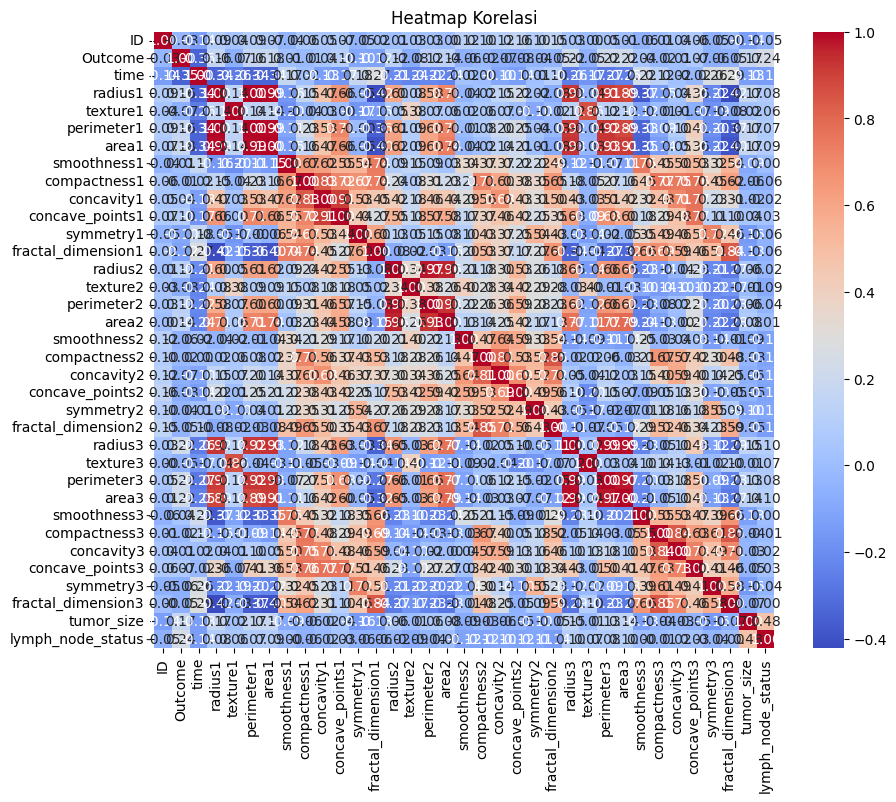

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi
correlation_matrix = data.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))  # Atur ukuran gambar
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [19]:
import pandas as pd

# Calculate correlations with target
target_variable = 'Outcome' # Name of the target column
correlations = data.corrwith(data[target_variable])

# Print correlations
print("\nCorrelation of All Features with Outcome:")
print(correlations)


Correlation of All Features with Outcome:
ID                   -0.031887
Outcome               1.000000
time                 -0.346033
radius1               0.163639
texture1             -0.069888
perimeter1            0.164672
area1                 0.178668
smoothness1           0.012789
compactness1         -0.011520
concavity1            0.041231
concave_points1       0.103772
symmetry1            -0.101712
fractal_dimension1   -0.120151
radius2               0.115318
texture2             -0.077835
perimeter2            0.121759
area2                 0.135859
smoothness2          -0.059774
compactness2         -0.016591
concavity2           -0.071108
concave_points2      -0.077726
symmetry2            -0.040898
fractal_dimension2   -0.048354
radius3               0.221101
texture3             -0.051249
perimeter3            0.217082
area3                 0.222812
smoothness3           0.035943
compactness3         -0.023835
concavity3            0.012775
concave_points3       0.067

In [20]:
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier
    dataframe_filtered = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

    return dataframe_filtered

# Menghapus outlier dari semua kolom numerik
for column in num_cols:
    data1 = remove_outliers_iqr(data, column)

# Verifikasi jumlah data setelah penghapusan outlier
print(f"Jumlah data sebelum penghapusan outlier: {len(data)}")
print(f"Jumlah data setelah penghapusan outlier: {len(data1)}")

Jumlah data sebelum penghapusan outlier: 194
Jumlah data setelah penghapusan outlier: 182


In [21]:
# Calculate correlations with target
target_variable = 'Outcome'
correlations = data.corrwith(data[target_variable])

# Filter for positively correlated features
positive_corr_features = correlations[correlations > 0].index.tolist()

# Ensure target variable is kept
if target_variable not in positive_corr_features:
    positive_corr_features.append(target_variable)


# Select only the positively correlated features and the target variable
data = data[positive_corr_features]

# Display the first few rows of the modified dataframe
print("Features with positive correlation to Outcome:")
print(positive_corr_features)
print("\n")
data.head()

Features with positive correlation to Outcome:
['Outcome', 'radius1', 'perimeter1', 'area1', 'smoothness1', 'concavity1', 'concave_points1', 'radius2', 'perimeter2', 'area2', 'radius3', 'perimeter3', 'area3', 'smoothness3', 'concavity3', 'concave_points3', 'tumor_size', 'lymph_node_status']




,Outcome,radius1,perimeter1,area1,smoothness1,concavity1,concave_points1,radius2,perimeter2,area2,radius3,perimeter3,area3,smoothness3,concavity3,concave_points3,tumor_size,lymph_node_status
0,0,18.02,117.50,1013.0,0.09489,0.1086,0.07055,0.6249,3.972,71.55,21.63,139.70,1436.0,0.1195,0.3140,0.1170,5.0,17
1,0,17.99,122.80,1001.0,0.11840,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.1622,0.7119,0.2654,3.0,10
2,0,21.37,137.50,1373.0,0.08836,0.1255,0.08180,0.5854,3.928,82.15,24.90,159.10,1949.0,0.1188,0.3414,0.2032,2.5,0
3,0,11.42,77.58,386.1,0.14250,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.2098,0.6869,0.2575,2.0,0
4,1,20.29,135.10,1297.0,0.10030,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.1374,0.4000,0.1625,3.5,0


In [22]:
# Memisahkan fitur (X) dan target (y) dalam dataset
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan fit dan transform pada fitur (X)
X_normalized = scaler.fit_transform(X)

# Membuat DataFrame baru dengan fitur yang telah dinormalisasi
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Menampilkan beberapa baris pertama dari DataFrame yang telah dinormalisasi
X_normalized.head()

,radius1,perimeter1,area1,smoothness1,concavity1,concave_points1,radius2,perimeter2,area2,radius3,perimeter3,area3,smoothness3,concavity3,concave_points3,tumor_size,lymph_node_status
0,0.434542,0.413793,0.344948,0.285673,0.210069,0.277738,0.265260,0.232457,0.190590,0.394347,0.371176,0.273322,0.267183,0.253067,0.336803,0.479167,0.809524
1,0.432698,0.461887,0.338594,0.622831,0.685467,0.700923,0.554516,0.613177,0.461607,0.562584,0.676411,0.445050,0.570687,0.600269,0.904711,0.270833,0.476190
2,0.640443,0.595281,0.535586,0.192026,0.252023,0.339930,0.240955,0.228828,0.225688,0.541050,0.503059,0.424431,0.262208,0.276976,0.666679,0.218750,0.000000
3,0.028888,0.051543,0.012974,0.968450,0.539745,0.469291,0.185700,0.189000,0.043840,0.092867,0.093610,0.017556,0.909020,0.578454,0.874479,0.166667,0.000000
4,0.574063,0.573503,0.495340,0.363258,0.432004,0.464315,0.346665,0.353344,0.266382,0.435173,0.456152,0.314266,0.394413,0.328109,0.510926,0.322917,0.000000


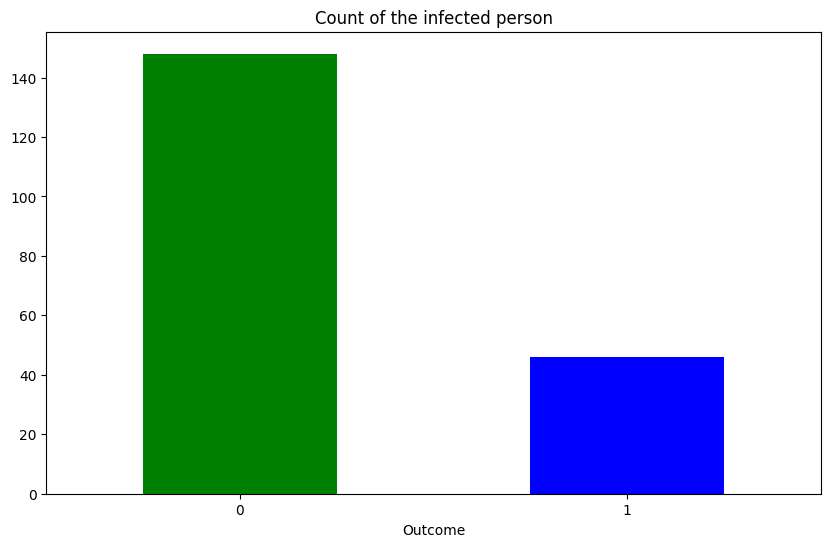

In [24]:
# Membuat visualisasi berupa diagram batang (bar plot) yang menunjukkan jumlah individu yang termasuk dalam masing-masing kategori pada kolom infected
data['Outcome'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the infected person")
plt.xticks(rotation=0);

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming you have your features in 'X' and target in 'y'

# Initialize SMOTE with a smaller k_neighbors value
smote = SMOTE(random_state=42)  # or k_neighbors=minority_class_size - 1

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

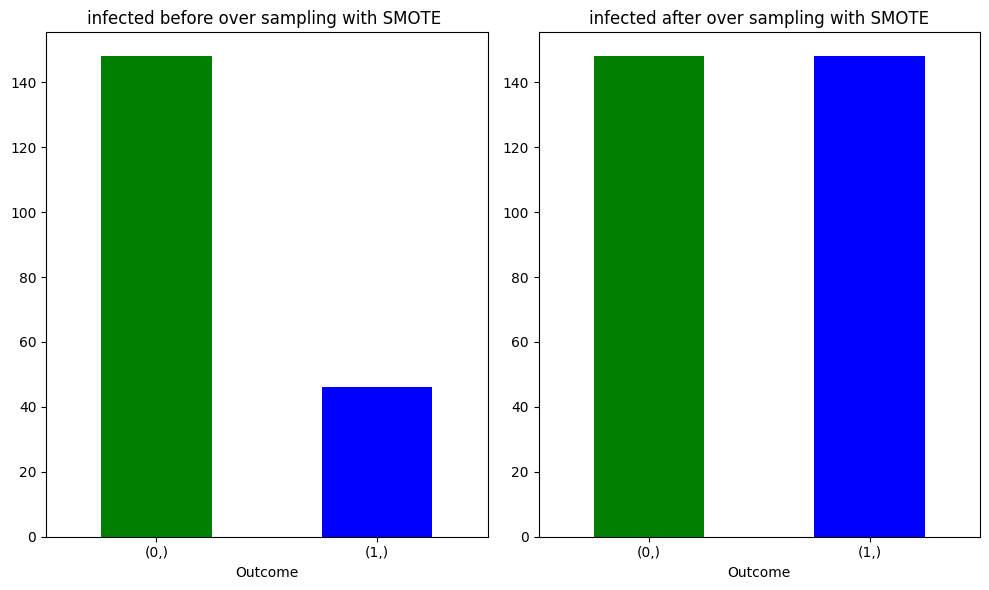

In [26]:
plt.figure(figsize=(12, 4)) # Membuat sebuah figure (gambar) baru dengan ukuran 12x4 inci

new_df1 = pd.DataFrame(data=y) # Membuat DataFrame baru, new_df1

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("infected before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2) # Membuat subplot pertama dengan layout 1 baris dan 2 kolom
new_df2 = pd.DataFrame(data=y_resampled)


new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue']) # Menghitung frekuensi masing-masing kategori (0 dan 1), membuat diagram batang (bar plot) berdasarkan frekuensi kategori
plt.title("infected after over sampling with SMOTE") # Memberikan judul pada subplot pertama
plt.xticks(rotation=0); # Menetapkan label sumbu-x (kategori 0 dan 1) untuk tetap dalam posisi horizontal

plt.tight_layout() # Mengatur layout agar subplot tidak saling tumpang tindih
plt.show() # Menampilkan kedua plot dalam satu figure

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy with Best Model: 0.7333333333333333


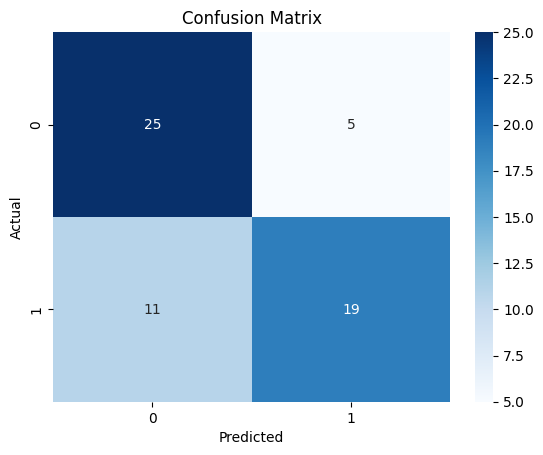

              precision    recall  f1-score   support

           0       0.69      0.83      0.76        30
           1       0.79      0.63      0.70        30

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],  # Measure for split quality
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',  # Use accuracy as the scoring metric
                           cv=5,  # Perform 5-fold cross-validation
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new model with the best hyperparameters
best_model = DecisionTreeClassifier(random_state=42, **best_params)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy}")

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy with Best Model: 0.8666666666666667


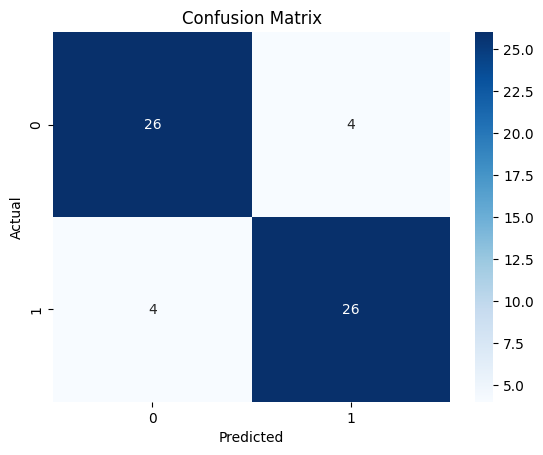

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.87      0.87      0.87        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Function to measure split quality
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

# Create a GridSearchCV object for Random Forest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new model with the best hyperparameters
best_model = RandomForestClassifier(random_state=42, **best_params)

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))
